Reducing Hospital readmissions 

In [108]:
# import modules and packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
hsp_df=pd.read_csv("C:/Users/sai varsha/OneDrive/Desktop/hospital_readmissions (1).csv")
hsp_df


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


In [4]:
hsp_df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [78]:
hsp_df.tail()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
24995,14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes,very senior-old
24996,2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes,very senior-old
24997,5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes,senior-old age
24998,2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no,senior-old age
24999,10,37,1,24,0,0,0,Missing,Other,Diabetes,Circulatory,no,no,no,no,yes,late-middle age


In [110]:
# quick explorations of dataseet
hsp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [111]:
# renaming the columns
hsp_df.rename(columns={'diag_1':'primary_diagnosis','diag_2':'sec_diagnosis','diag_3':'additional_sec_diag','change':'med_change','A1Ctest':'HbA1ctest'},inplace=True)
hsp_df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [112]:
# converting age column to categorical data
# checking for the unique values in the age column
print(hsp_df['age'].unique())

['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']


In [115]:
# creating a new column called at age_categories
hsp_df['age_cat']=hsp_df['age'].replace({'[70-80)':'senior-old age','[50-60)':'late-middle age','[60-70)':'mid-old age','[40-50)':
'early-middle age','[80-90)':'very senior-old','[90-100)':'centenarians'})

print('\n')
#converting column type to categorical data type
hsp_df['age_cat'] = hsp_df['age_cat'].astype('category')
print('dtype :',hsp_df['age_cat'].dtype)


#viewing age and age_cat columns
hsp_df[['age','age_cat']]



dtype : category


,age,age_cat
0,[70-80),senior-old age
1,[70-80),senior-old age
2,[50-60),late-middle age
3,[70-80),senior-old age
4,[60-70),mid-old age
...,...,...
24995,[80-90),very senior-old
24996,[80-90),very senior-old
24997,[70-80),senior-old age
24998,[70-80),senior-old age


In [118]:
# drop age column
hsp_df.drop('age', axis=1,  inplace=True)

# changing the datatype to the correct datatype
#  columns to be converted to categorical data type
cols_to_convert=['medical_specialty','primary_diagnosis','sec_diagnosis','additional_sec_diag','glucose_test','HbA1ctest','med_change','diabetes_med','readmitted']

# convert columns to categorical data types
hsp_df[cols_to_convert]=hsp_df[cols_to_convert].astype('category')
hsp_df.dtypes

time_in_hospital          int64
n_lab_procedures          int64
n_procedures              int64
n_medications             int64
n_outpatient              int64
n_inpatient               int64
n_emergency               int64
medical_specialty      category
primary_diagnosis      category
sec_diagnosis          category
additional_sec_diag    category
glucose_test           category
HbA1ctest              category
med_change             category
diabetes_med           category
readmitted             category
age_cat                category
dtype: object

In [9]:
# checking for duplicates
hsp_df.duplicated().sum()


np.int64(0)

In [10]:
# viewing the unique values of each column to check for inconsistent data
cols=hsp_df.columns

for c in cols:
    print(c)
    print(hsp_df[c].unique())

time_in_hospital
[ 8  3  5  2  1  4  7 10  6 12 11  9 14 13]
n_lab_procedures
[ 72  34  45  36  42  51  44  19  67  37  35  69  60  73  52   9  16  62
  54  58  40  23  32  65   1  47  39  59  68  66  43  30  46  48   5  24
  70  25  29  49  53  94  18  61  11  33  28  83  50  71  86  38   3  41
  31  55  56  27  64  82  26  90  21   2  20  17  78 102  75  15   8   7
  76  63  57  10   4  22  91  74  14  13  89  79  81  84  80   6  77  12
 108  88  92  93 101  97 100  85  95  87  98  96  99 103 111 106 113 109
 105]
n_procedures
[1 2 0 6 3 5 4]
n_medications
[18 13 12  7 10 21 16  6 26 20 11 27 15  8 22 17 14 28  5 24  9 19  1 25
 32  3 31 23 39 34 40  4 38  2 33 56 44 29 46 30 47 41 35 36 50 49 54 57
 60 37 61 52 51 42 53 43 45 59 62 79 63 55 65 48 58 69 68 72 75 64]
n_outpatient
[ 2  0  1  3  7  5  4  6  9  8 11 10 15 21 13 12 27 16 14 33 20 18 23]
n_inpatient
[ 0  2  3  1  6  9  7  4  5  8 10 11 14 12 15 13]
n_emergency
[ 0  1 10  2  3  4  5  7  6 12  8 16 28 18 11  9 37 21 13 19 64

# Data Cleaning

# The dataset contained 2500 rows and 17 columns, and these were what I did to the columns:

 There were no missing or duplicates data in the dataframe.

 The columns named diag_1 ,diag_2,diag_3,change,A1Ctest, were renamed as primary_diagnosis ,sec_diagnos ,additional_sec_diag ,med_change , HbA1ctest respectively

For the age column although the wrong categorization done already couldn't be corrected, the various age categories named as [70-80), [50-60),[60-70), [40-50), [80-90),[90-100), were renamed as senior-old age, late-middle age , mid-oldd-age, early-middle age, very senior-old,centenarians respectively.

The data type of these rows (medical_specialty, primary_diagnosis , sec_diagnosis, additional_sec_diag, glucose_test, HbA1ctest, med_change, diabetes_med, readmitted)were converted to categorical data type

At the end there was 2500 rows and 17 columns .

 # EXPLORATORY DATA ANALYSIS

In [11]:
# using pd.describe to explore numeric columns
hsp_df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [12]:
# describing the categorical columns
hsp_df.describe(exclude=[np.number])

,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,7,8,8,8,3,3,2,2,2,6
top,Missing,Circulatory,Other,Other,no,no,no,yes,no,senior-old age
freq,12382,7824,9056,9107,23625,20938,13497,19228,13246,6837


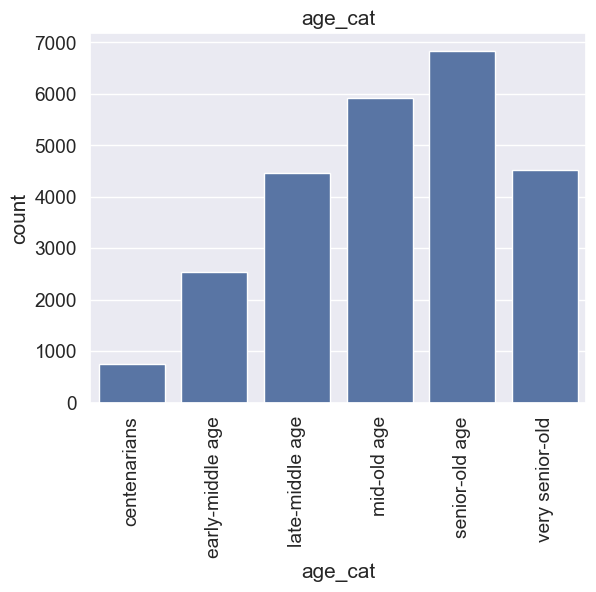

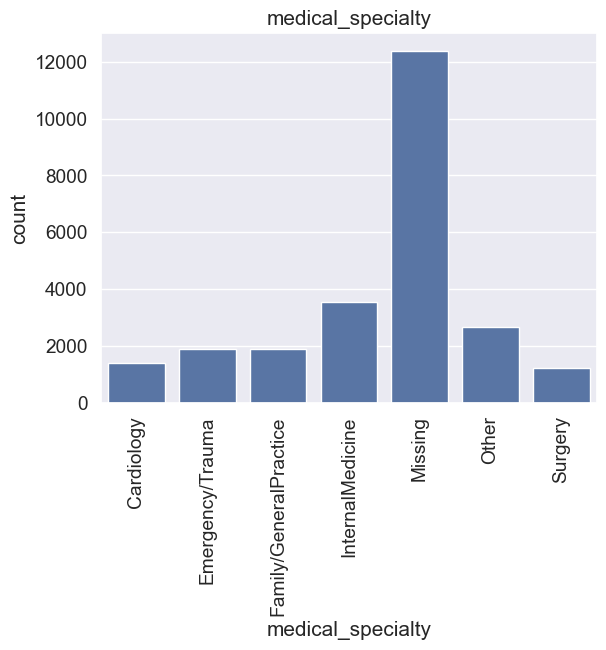

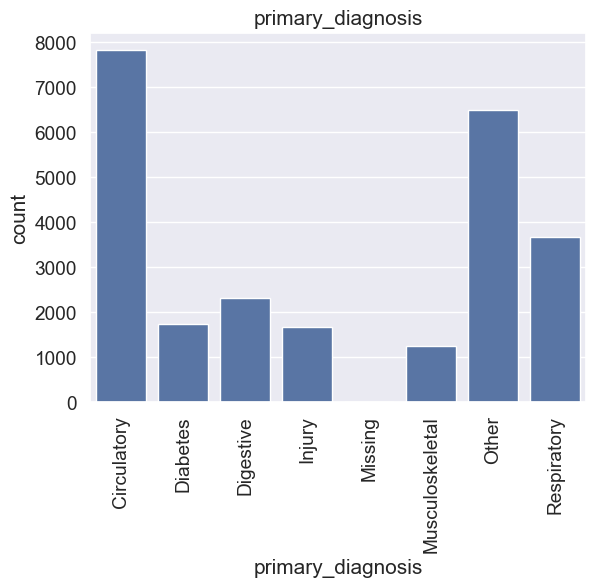

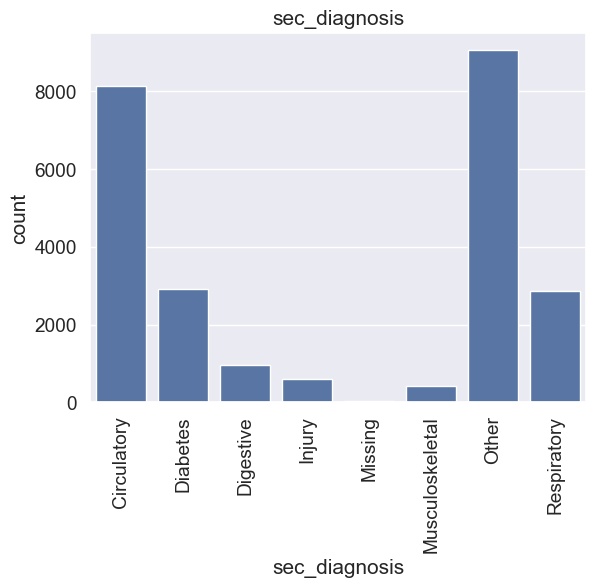

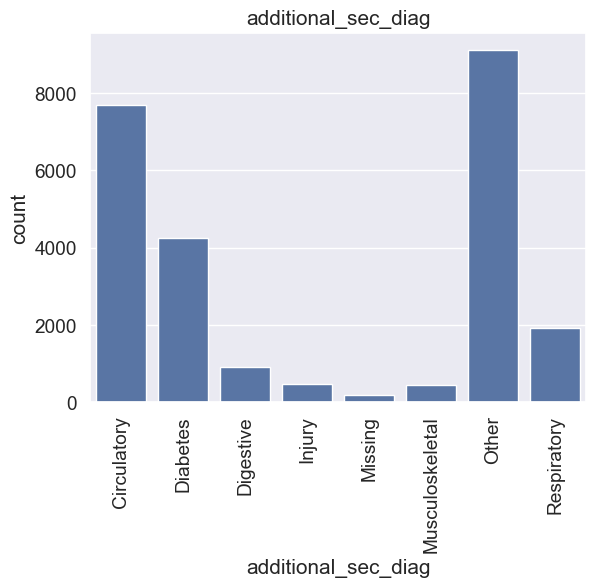

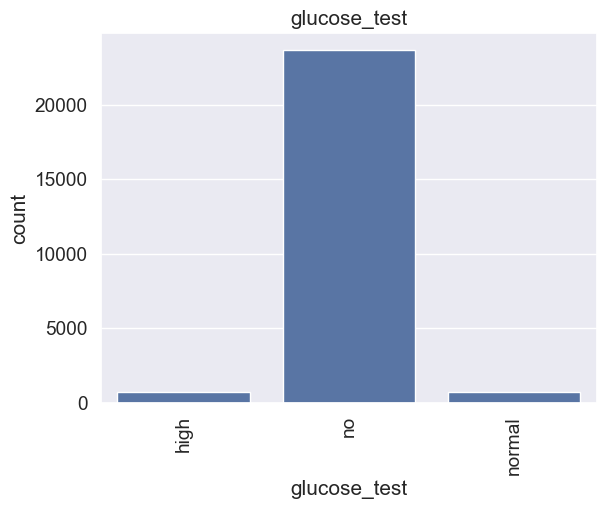

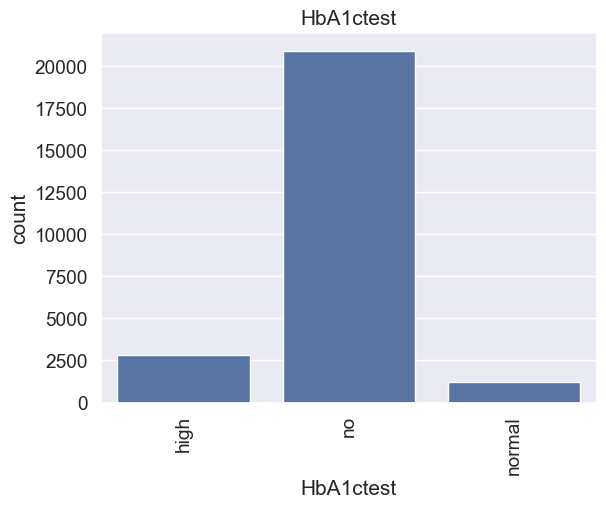

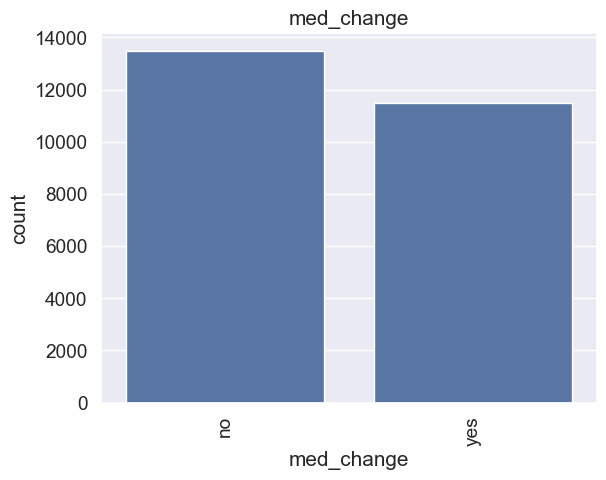

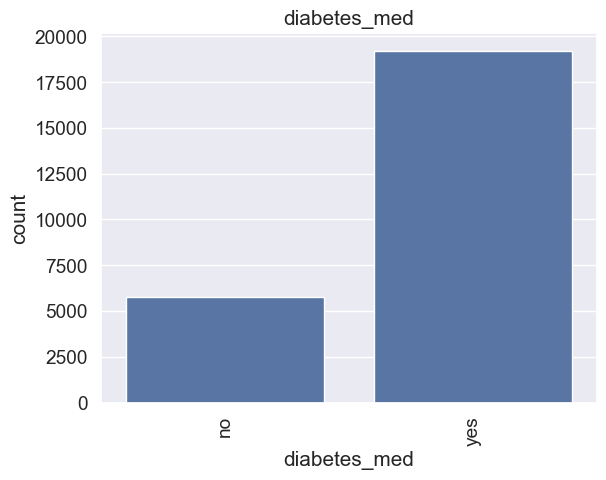

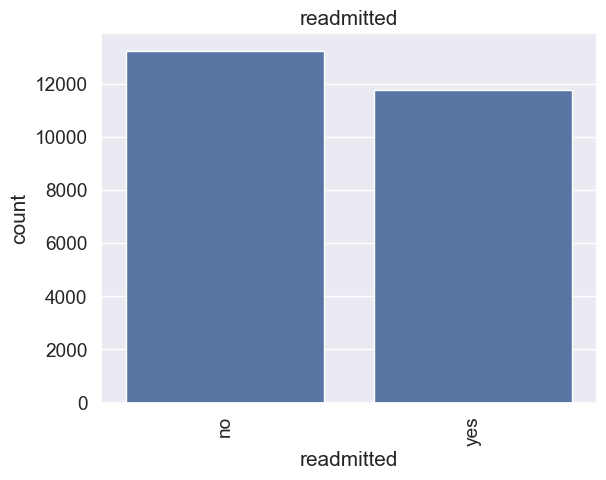

In [13]:
# visualize the informations above for easy to understanding
# values counting the categorical columns
import seaborn as sns
columns = ['age_cat','medical_specialty','primary_diagnosis',
           'sec_diagnosis','additional_sec_diag','glucose_test','HbA1ctest','med_change','diabetes_med','readmitted']


sns.set(style="darkgrid",font_scale=1.25)
sns.set_palette('deep',3)

#my_colours=['green','skyblue','purple','pink']

def plot_cat_count():
    for c in columns:
        sns.countplot(x=c, data=hsp_df)#,palette=my_colours)
        plt.title(c)
        plt.xticks(rotation=90)
        plt.show()

plot_cat_count()

# MOST COMMON PRIMARY DIAGNOSIS BY AGE GROUP

In [14]:
# using groupby and value counts to gain insights
df=hsp_df.groupby('age_cat')['primary_diagnosis'].value_counts(normalize=True,sort=True).to_frame().unstack()
df
                                                             

C:\Users\sai varsha\AppData\Local\Temp\ipykernel_23744\1138568707.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df=hsp_df.groupby('age_cat')['primary_diagnosis'].value_counts(normalize=True,sort=True).to_frame().unstack()


proportion                                          \
primary_diagnosis Circulatory  Diabetes Digestive    Injury   Missing   
age_cat                                                                 
centenarians         0.304000  0.045333  0.100000  0.088000  0.000000   
early-middle age     0.199052  0.145735  0.107030  0.063981  0.000000   
late-middle age      0.282120  0.088275  0.099281  0.061321  0.000000   
mid-old age          0.331811  0.065111  0.093692  0.067648  0.000169   
senior-old age       0.349861  0.056311  0.085564  0.064941  0.000146   
very senior-old      0.328167  0.040080  0.089017  0.071081  0.000443   

                                                         
primary_diagnosis Musculoskeletal     Other Respiratory  
age_cat                                                  
centenarians             0.010667  0.293333    0.158667  
early-middle age         0.039494  0.296209    0.148499  
late-middle age          0.051662  0.261456    0.155885  
mid-old age              0.063081  0.237105    0.141383  
senior-old age           0.054556  0.247623    0.140998  
very senior-old          0.037201  0.281001    0.153012

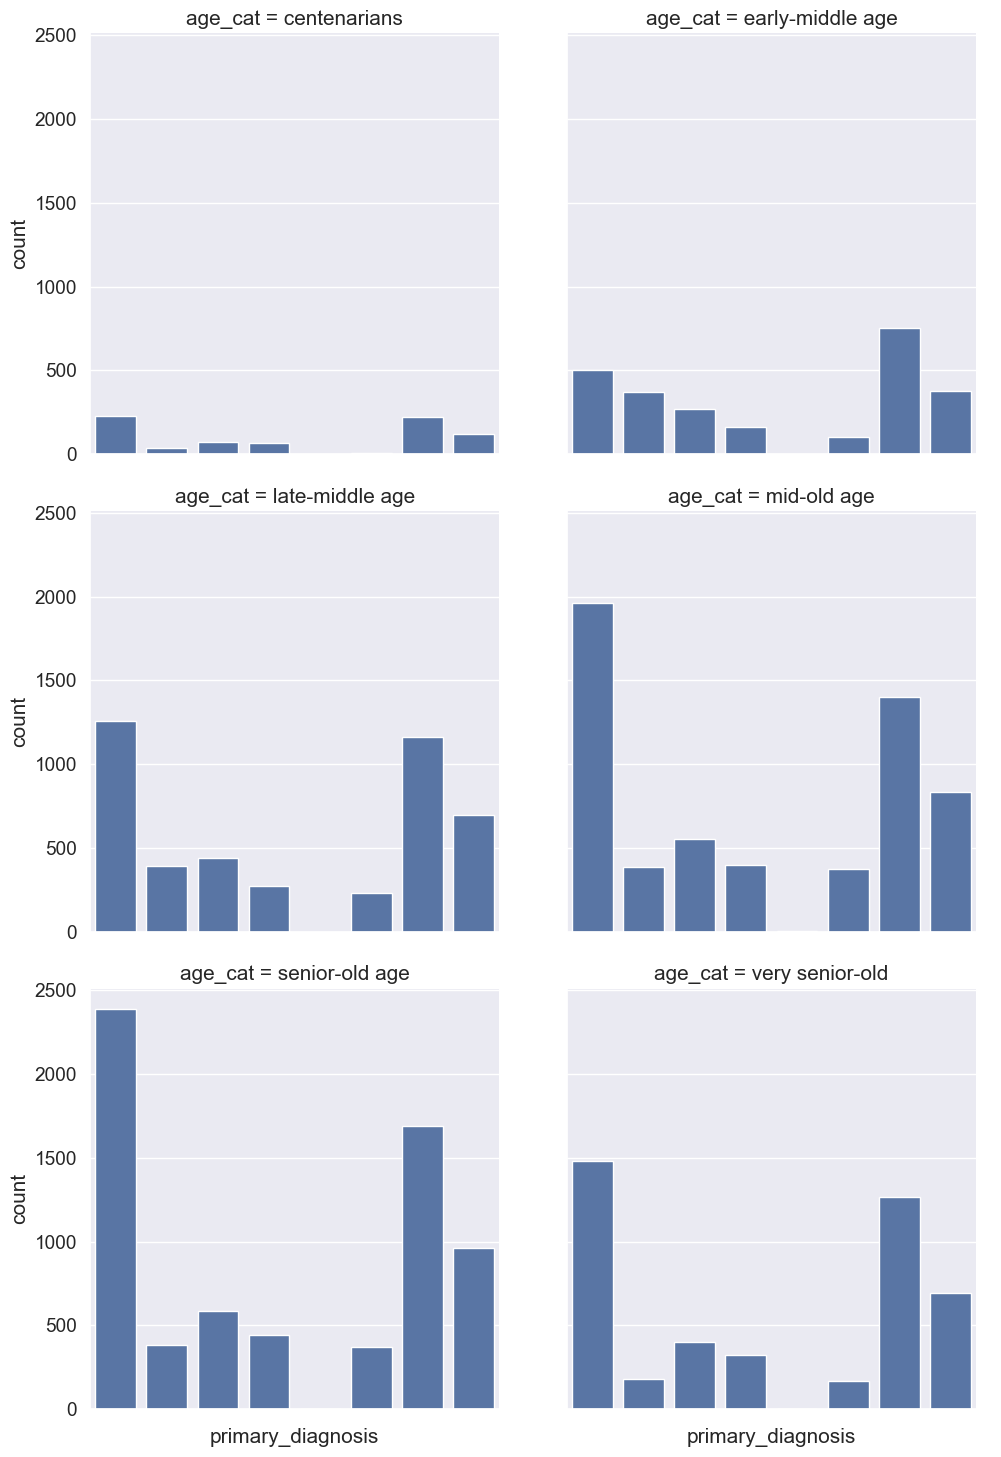

In [15]:
#countplot showing the most common primary diagnosis for each age category
g = sns.catplot(x='primary_diagnosis',col='age_cat', kind='count', data=hsp_df, col_wrap=2)
g.set_xticklabels(rotation=90)
plt.show()

# Explore the effect of a diabetes diagnosis on readmission rates

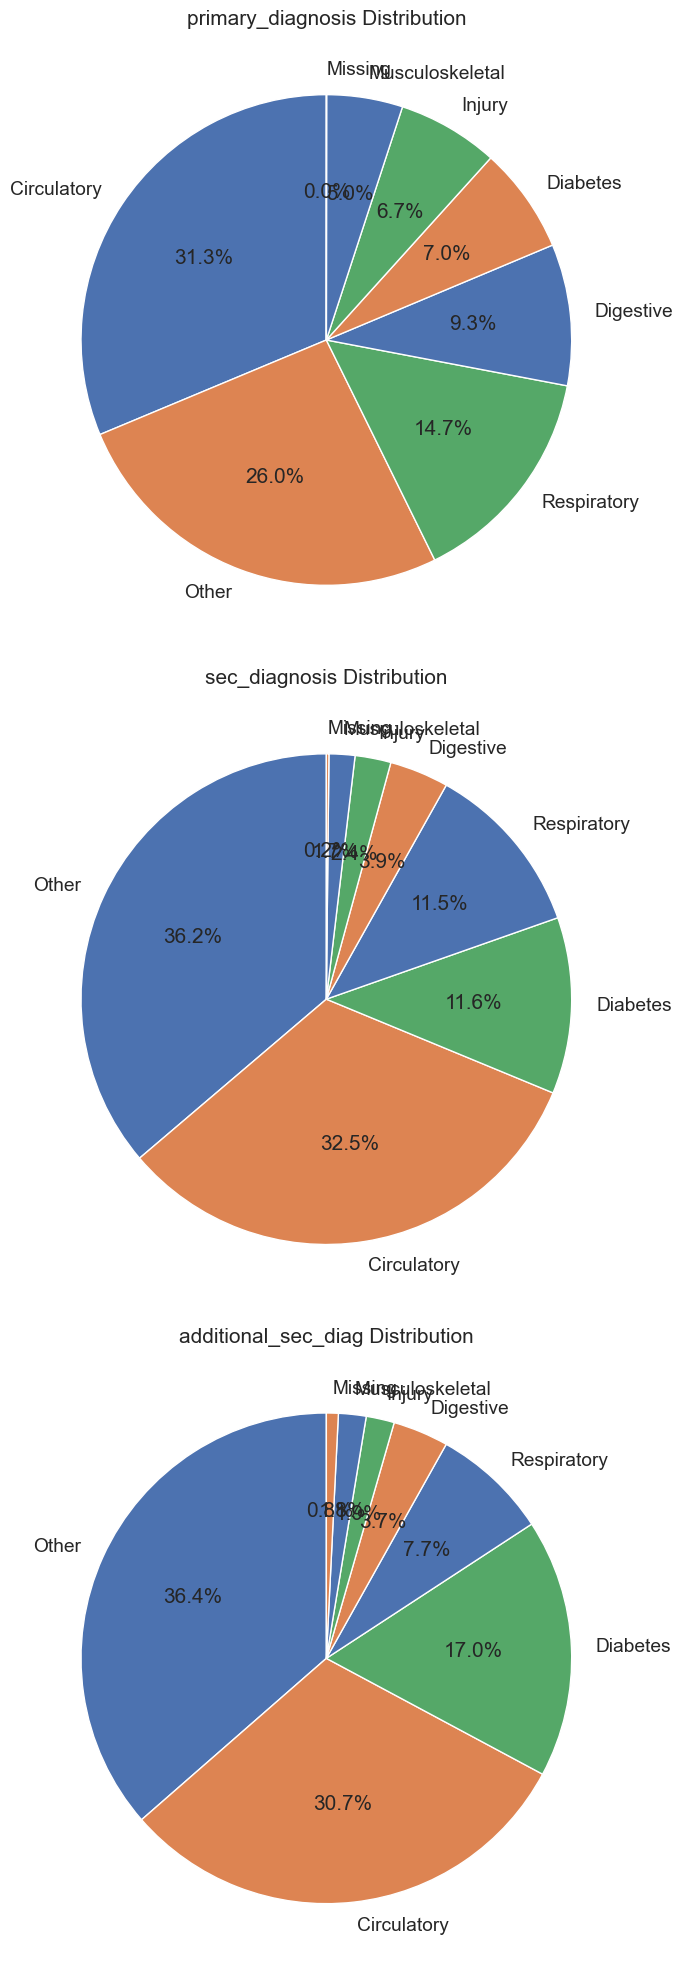

In [16]:
#distribution health conditions for the various diagnosis 

cat_vars = ['primary_diagnosis','sec_diagnosis','additional_sec_diag']

fig,axs = plt.subplots(nrows=3, ncols=1, figsize=(25,20))

for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        cat_counts = hsp_df[var].value_counts()
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')
        
fig.tight_layout()
plt.show()

In [17]:
#subsetting for patient with DM diagnosis
diabetes_pt = hsp_df[(hsp_df['primary_diagnosis'] == 'Diabetes') | (hsp_df['sec_diagnosis'] == 'Diabetes') |
       (hsp_df['additional_sec_diag'] == 'Diabetes')]
diabetes_pt.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,senior-old age
12,8,67,0,21,0,0,0,Other,Diabetes,Circulatory,Other,no,normal,no,yes,no,senior-old age
14,2,73,1,26,0,0,0,InternalMedicine,Circulatory,Other,Diabetes,no,no,no,yes,no,very senior-old
16,3,52,0,10,0,0,0,Other,Circulatory,Other,Diabetes,no,no,no,yes,yes,senior-old age
18,7,72,0,13,0,0,0,InternalMedicine,Diabetes,Other,Other,no,high,no,yes,yes,early-middle age


In [18]:
#subsetting patient with non-DM diagnosis
non_diabetes_pt = hsp_df[~((hsp_df['primary_diagnosis'] == 'Diabetes') | (hsp_df['sec_diagnosis'] == 'Diabetes') |
       (hsp_df['additional_sec_diag'] == 'Diabetes'))]

#numbers of non-DM patient
print('number of non-DM patient: ',len(non_diabetes_pt.index))

#numbers of DM patient
print('number of DM patient: ',len(diabetes_pt.index))

number of non-DM patient:  16212
number of DM patient:  8788


In [19]:
#value counts of DM patients readmitted
diabetes_pt['readmitted'].value_counts(normalize=True)

readmitted
no     0.534706
yes    0.465294
Name: proportion, dtype: float64

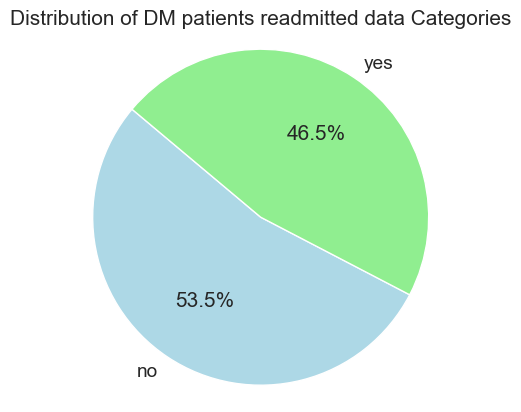

In [20]:
# Data for the pie chart
readmitted_data = {
    'no'   :  0.534706,
    'yes'   : 0.465294
}

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

# Colors for the pie chart
colors = ['lightblue', 'lightgreen']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of DM patients readmitted data Categories')

# Show the pie chart
plt.show()

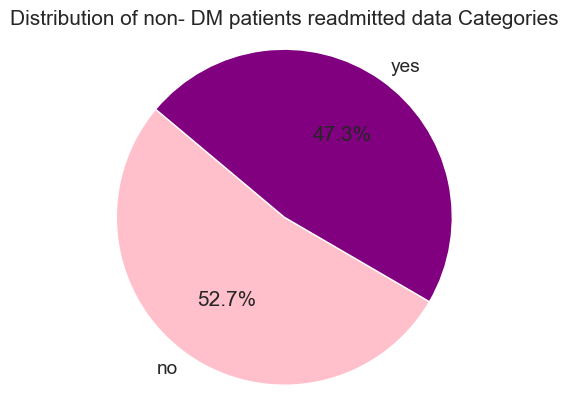

In [21]:
# Data for the pie chart
readmitted_data = {
    'no'   :  0.527202,
    'yes'   : 0.472798
}

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

# Colors for the pie chart
colors = ['pink', 'purple']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of non- DM patients readmitted data Categories')

# Show the pie chart
plt.show()

In [22]:
#table showing the count of readmitted patient for each diagnosis
pd.set_option('display.max_rows', 64)
hsp_df.groupby(['primary_diagnosis','sec_diagnosis','additional_sec_diag'])['readmitted'].count().to_frame().unstack()

C:\Users\sai varsha\AppData\Local\Temp\ipykernel_23744\2569994322.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hsp_df.groupby(['primary_diagnosis','sec_diagnosis','additional_sec_diag'])['readmitted'].count().to_frame().unstack()


readmitted                            \
additional_sec_diag               Circulatory Diabetes Digestive Injury   
primary_diagnosis sec_diagnosis                                           
Circulatory       Circulatory            1724      877        48     66   
                  Diabetes                394       28        12      8   
                  Digestive                26        6        10      0   
                  Injury                   70       21         3     14   
                  Missing                   3        0         0      0   
                  Musculoskeletal           9       11         2      1   
                  Other                   595      381        35     18   
                  Respiratory             378      145        16     15   
Diabetes          Circulatory             133       10        13      6   
                  Diabetes                  2        1         2      0   
                  Digestive                13        2        13      2   
                  Injury                    4        0         1      2   
                  Missing                   0        0         0      0   
                  Musculoskeletal          18        0         0      2   
                  Other                   237       25        46     11   
                  Respiratory              35        1         3      1   
Digestive         Circulatory             121       85        39      4   
                  Diabetes                 99        3        38      1   
                  Digestive                60       92        81      3   
                  Injury                    8        3         7      1   
                  Missing                   0        1         0      0   
                  Musculoskeletal           3        4         2      0   
                  Other                   206      174       129     13   
                  Respiratory              56       26        21      2   
Injury            Circulatory             118       74         1     16   
                  Diabetes                 62        5         2      6   
                  Digestive                10       10         6      2   
                  Injury                   36       17         2     27   
                  Missing                   0        5         0      0   
                  Musculoskeletal           6        8         1      2   
                  Other                   172      133        13     51   
                  Respiratory              23        7         2      8   
Missing           Circulatory               0        0         0      0   
                  Diabetes                  1        0         0      0   
                  Digestive                 0        0         0      0   
                  Injury                    0        0         0      0   
                  Missing                   0        0         0      0   
                  Musculoskeletal           0        0         0      0   
                  Other                     0        1         0      0   
                  Respiratory               0        0         0      0   
Musculoskeletal   Circulatory              71      128         5      6   
                  Diabetes                122        5         2      1   
                  Digestive                 7        4         3      2   
                  Injury                    4        5         5      2   
                  Missing                   0        0         0      0   
                  Musculoskeletal          22       48         0      4   
                  Other                    95      110         7     13   
                  Respiratory              28       20         0      4   
Other             Circulatory             347      280        34     16   
                  Diabetes                288       17        30     15   
                  Digestive                50       54      

In [23]:
#viewing the dataset
hsp_df.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,senior-old age
1,3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no,senior-old age
2,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,late-middle age
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,senior-old age
4,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,mid-old age


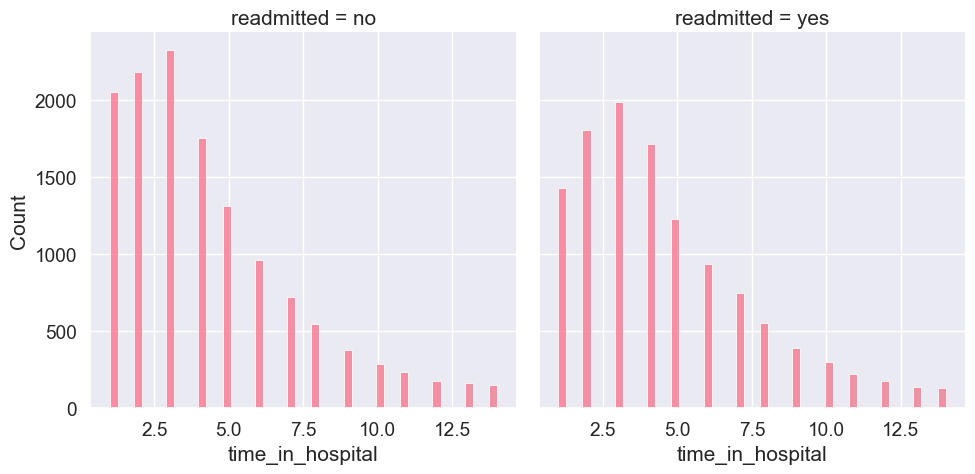

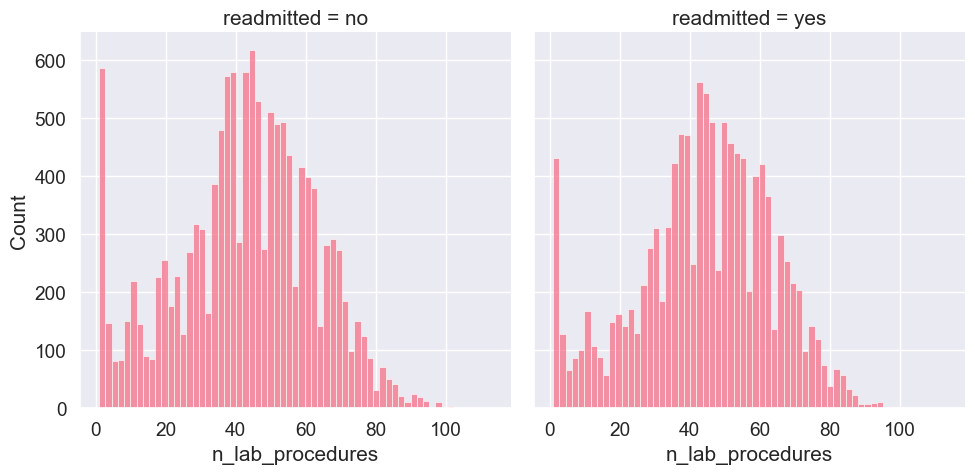

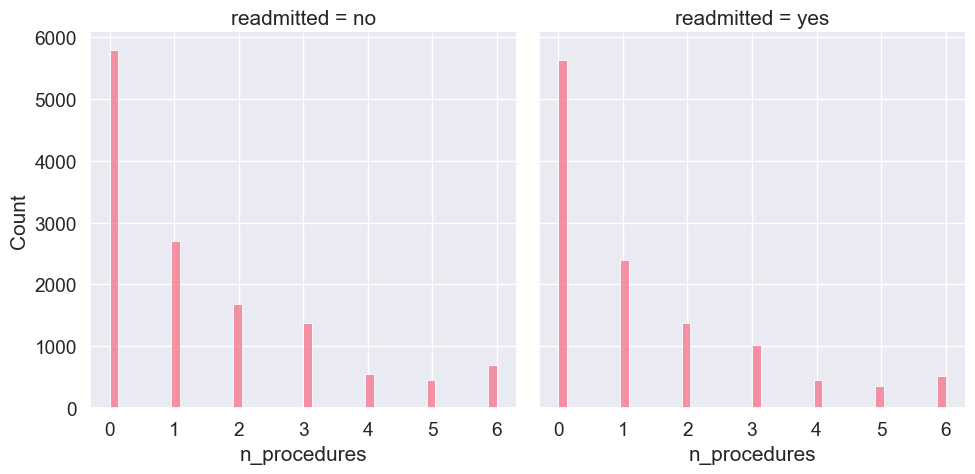

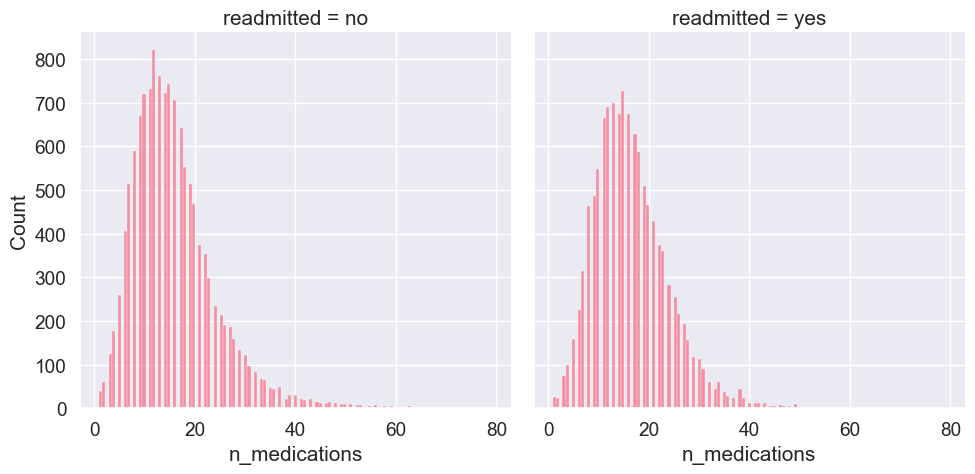

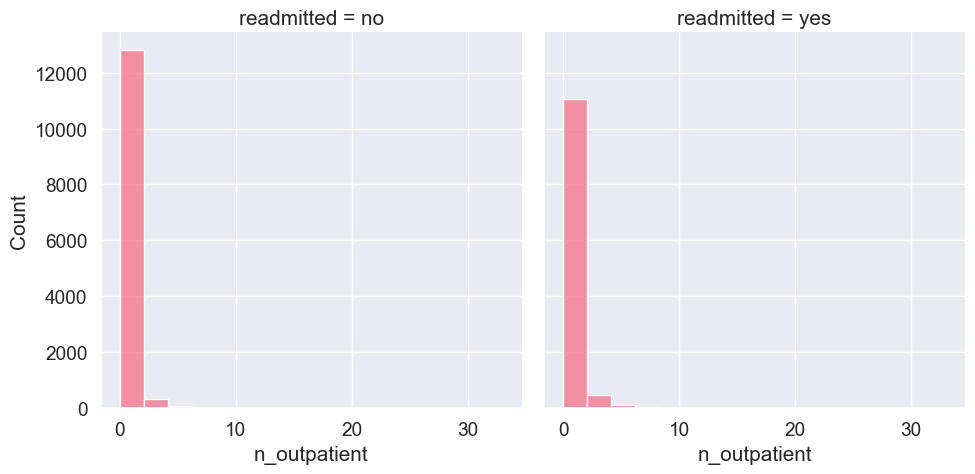

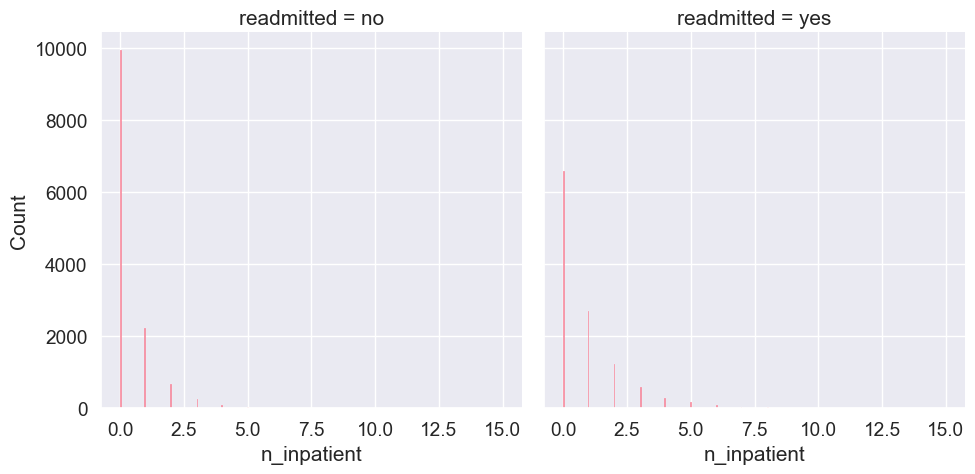

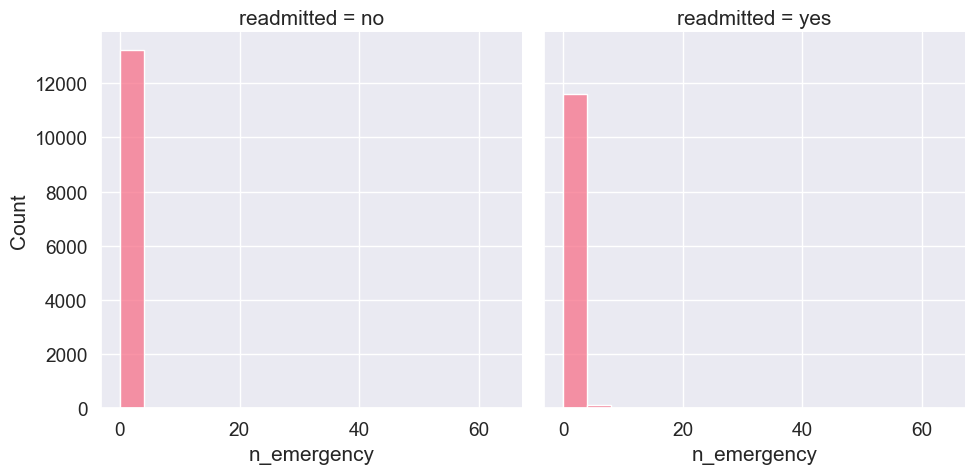

In [24]:
#plotting a grap showing the distribution of numerical columns by their readmitted status
columns = ['time_in_hospital','n_lab_procedures','n_procedures','n_medications','n_outpatient','n_inpatient','n_emergency']

sns.set(style='darkgrid',font_scale=1.25)
sns.set_palette('husl',3)

def plot_cat_count():
    for c in columns:
        sns.displot(x=c, data=hsp_df, col='readmitted',col_wrap=2)
        #plt.title(c)
        #plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()


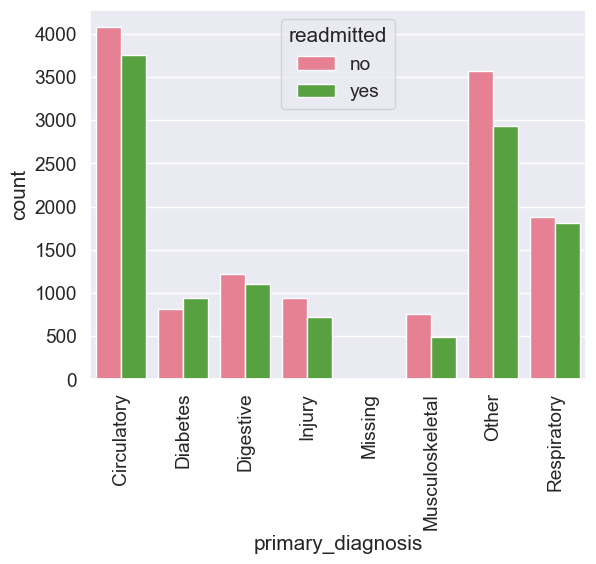

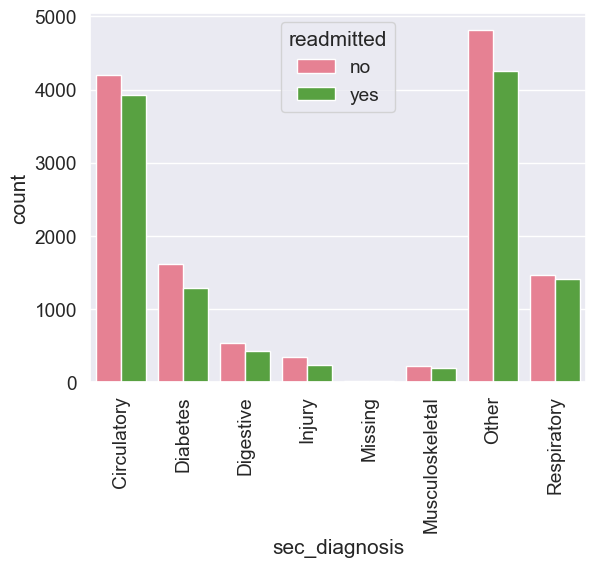

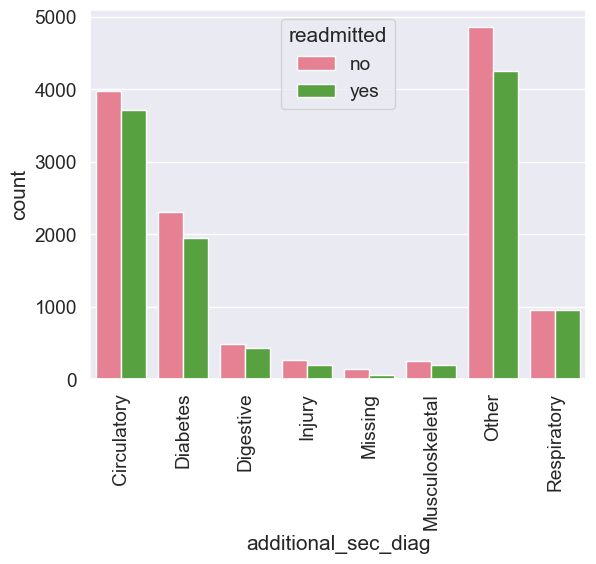

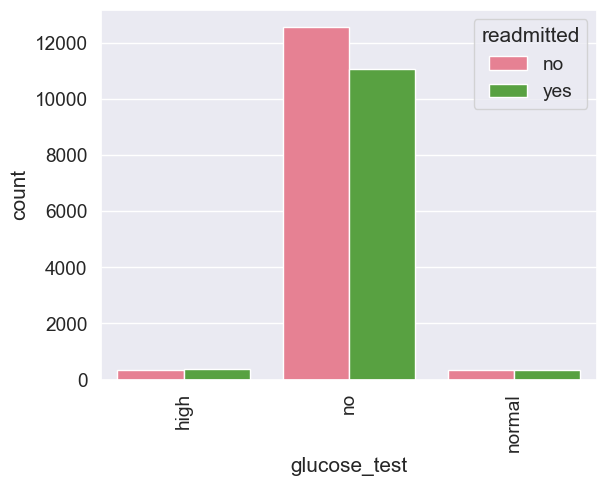

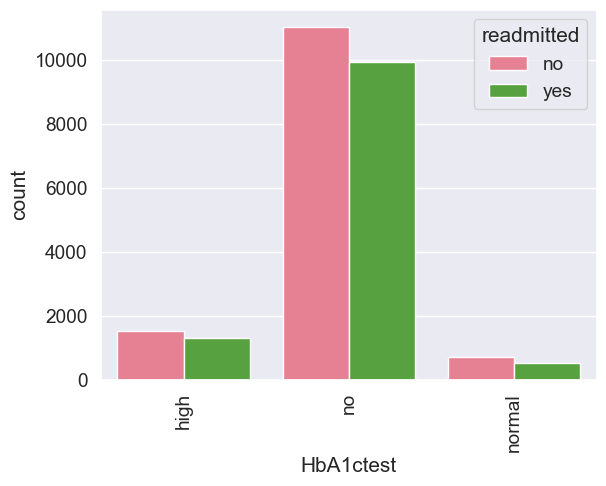

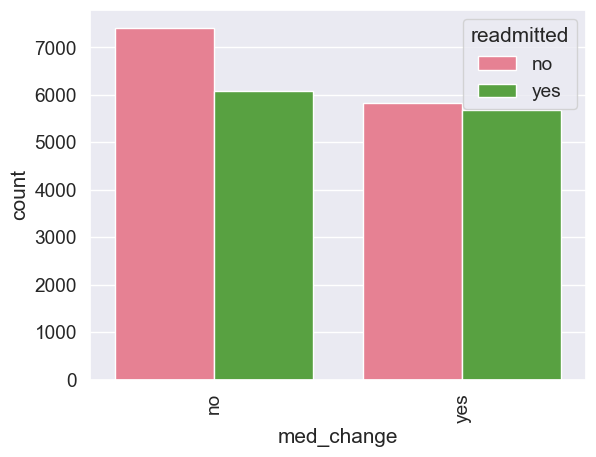

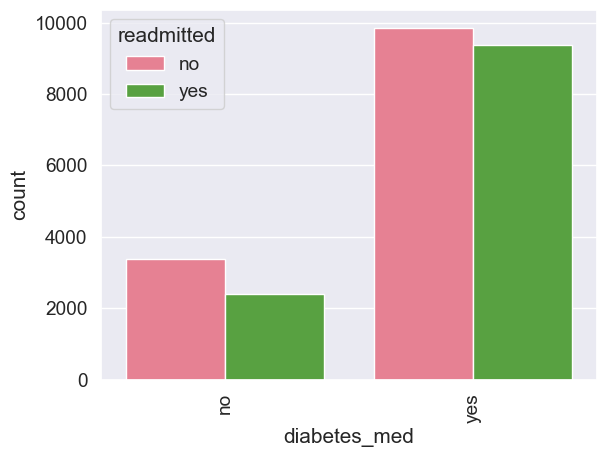

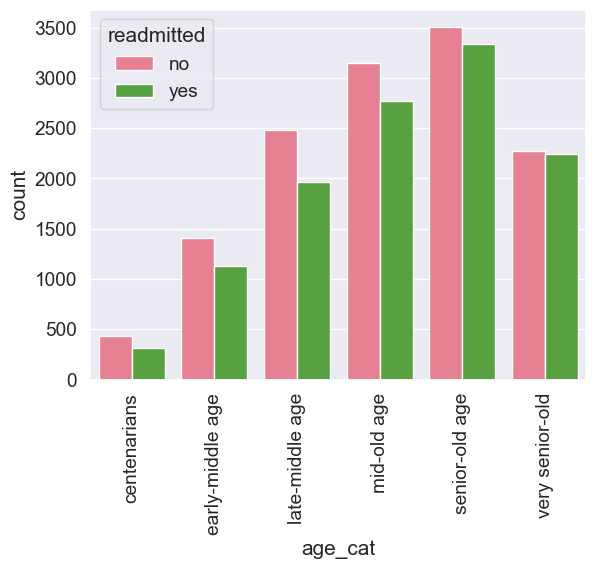

In [25]:
#visualizing the categorical columns by thier readmitted status
columns = ['primary_diagnosis','sec_diagnosis','additional_sec_diag',
           'glucose_test','HbA1ctest','med_change','diabetes_med','age_cat']

def count_plot():
    for c in columns:
        sns.countplot(x=c, hue='readmitted', data=hsp_df)
        plt.xticks(rotation=90)
        plt.show()
        
count_plot()

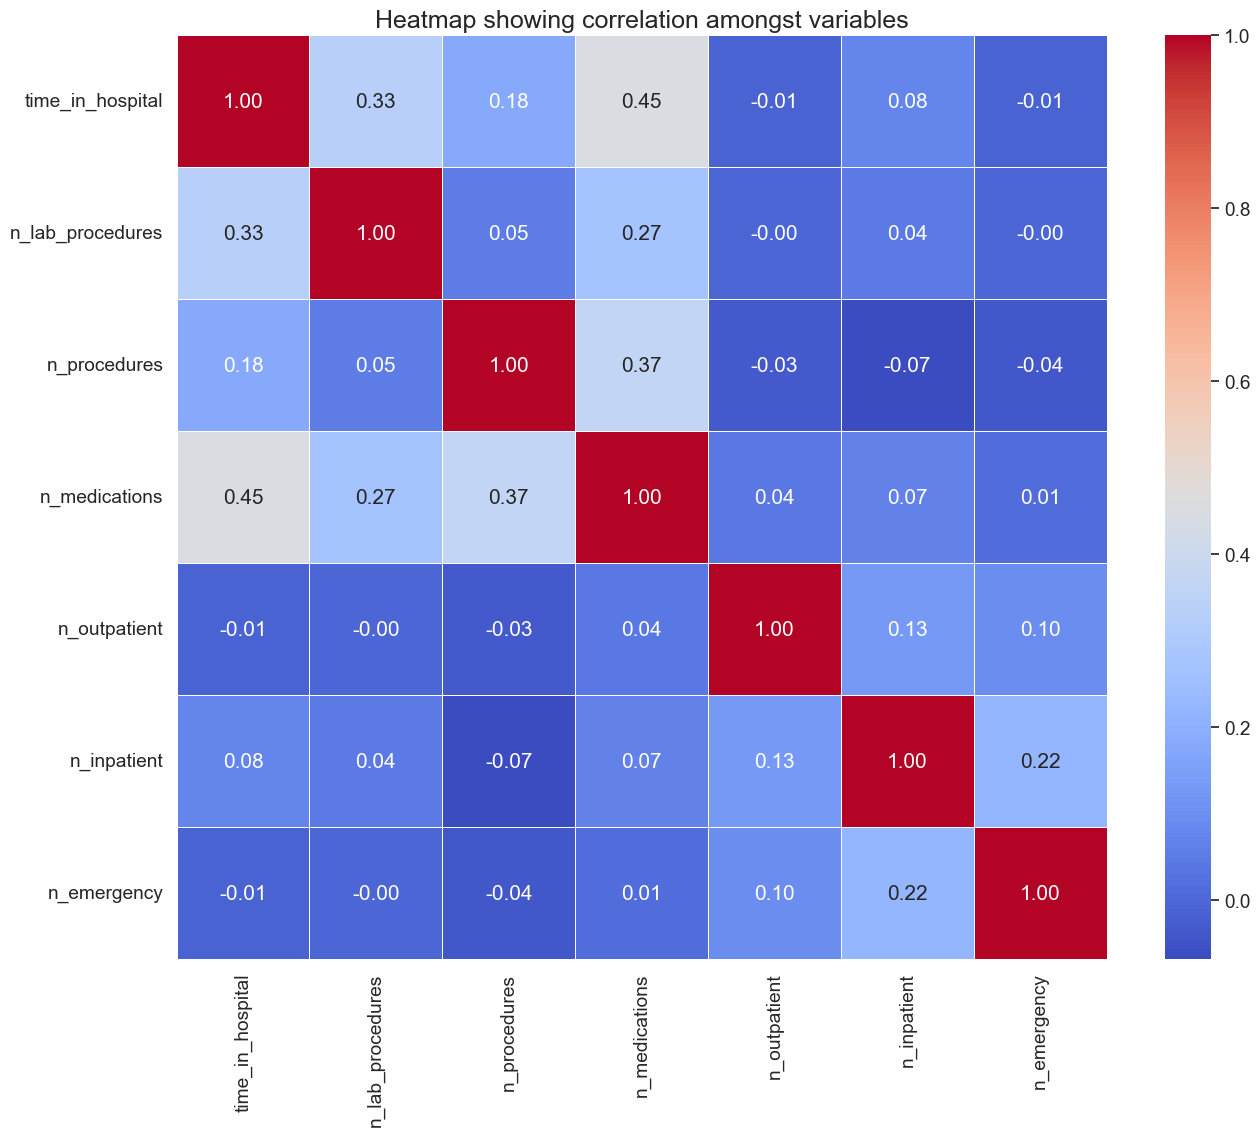

In [83]:
corr_matrix = hsp_df.corr(numeric_only=True)
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Heatmap showing correlation amongst variables', fontsize=18)
plt.show()

## Data Visualization summary:

From the graphs above, there are no significant factor that could show what group of patient were more likely to be readmitted as their distribution and patterns were alike across all categories of readmitted status.

However, we can notice the heatmap shows a weak correlation between n_inpatient and readmitted

In [80]:
#checking the variance of variables
#hsp_df.var(numeric_only=True)

#hsp_df.var(numeric_only=True)

hsp_df.select_dtypes(include='number').var()


time_in_hospital      9.008821
n_lab_procedures    392.777706
n_procedures          2.941840
n_medications        64.972173
n_outpatient          1.429168
n_inpatient           1.387569
n_emergency           0.784772
dtype: float64

#### Briefly Note that although we can notice there is a huge difference between the variance of the different columns I wont be standardizing or normalizing the variables as I would be using classification tree models because it has ability to describe non-linear dependencies and it does not require preprocessing of varibales before modelling.

In [90]:
#preprocessing categorical columns using pd get dummies
#dropping medical_specialty and 'readmitted'
features = hsp_df.drop(['medical_specialty','readmitted'], axis=1)
features

#using pandas get dummies encoder
X_features = pd.get_dummies(features, columns =['primary_diagnosis','sec_diagnosis','additional_sec_diag',
           'glucose_test','HbA1ctest','med_change','diabetes_med','age_cat'])
X = X_features.values

y = hsp_df['readmitted'].values

print('X shape:', X.shape)

print('y shape:', y.shape)

X shape: (25000, 48)
y shape: (25000,)


In [125]:
#checking if the data is balance
hsp_df['readmitted'].value_counts()


#hsp_df['readmitted'].value_counts(normalize=True) * 100




readmitted
no     13246
yes    11754
Name: count, dtype: int64

In [139]:
#import modules and packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score , recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

#train test split features and target varibales
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=23)

In [140]:

names = X_features.columns

## DECISION TREE CLASSIFIER

In [146]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# One-hot encode categorical columns
X_train_enc = pd.get_dummies(X_train)
X_test_enc = pd.get_dummies(X_test)

# Align columns (important in case test set has missing columns)
X_test_enc = X_test_enc.reindex(columns = X_train_enc.columns, fill_value=0)

# Ensure target is numeric
y_train_num = y_train.map({'yes': 1, 'no': 0}) if y_train.dtype == 'O' else y_train
y_test_num = y_test.map({'yes': 1, 'no': 0}) if y_test.dtype == 'O' else y_test

# Define and fit the model
dtc = DecisionTreeClassifier(random_state=2, max_depth=3, min_samples_leaf=0.2)
dtc.fit(X_train_enc, y_train_num)

# Make predictions
train_prediction = dtc.predict(X_train_enc)
test_predictions = dtc.predict(X_test_enc)

# Evaluate
print('Training_accuracy_score :', accuracy_score(y_train_num, train_prediction))
print('Testing_accuracy_score :', accuracy_score(y_test_num, test_predictions))
print('precision_score :', precision_score(y_test_num, test_predictions))
print('recall_score :', recall_score(y_test_num, test_predictions))


Training_accuracy_score : 0.6026857142857143
Testing_accuracy_score : 0.608
precision_score : 0.6168261562998405
recall_score : 0.4387407827566648


### RANDOM FOREST CLASSIFIER

In [156]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Combine train and test separately
X_train_final = pd.get_dummies(X_train, drop_first=True)
X_test_final = pd.get_dummies(X_test, drop_first=True)

# Make sure both train and test have the same columns
X_test_final = X_test_final.reindex(columns=X_train_final.columns, fill_value=0)

# Define the Random Forest model
rfc = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=6)

# Fit the model
rfc.fit(X_train_final, y_train)

# Predictions
train_prediction = rfc.predict(X_train_final)
test_predictions = rfc.predict(X_test_final)

# Training metrics
train_acc = accuracy_score(y_train, train_prediction)
print('Training Accuracy Score:', round(train_acc, 3))

# Testing metrics
test_acc = accuracy_score(y_test, test_predictions)
test_prec = precision_score(y_test, test_predictions, average='binary')  # use 'macro' if multi-class
test_rec = recall_score(y_test, test_predictions, average='binary')       # use 'macro' if multi-class

print('Testing Accuracy Score:', round(test_acc, 3))
print('Precision Score:', round(test_prec, 3))
print('Recall Score:', round(test_rec, 3))


Training Accuracy Score: 0.631
Testing Accuracy Score: 0.614
Precision Score: 0.628
Recall Score: 0.438


## MODEL SELECTION
I used DecisionTreeClassifier as a baseline model and RandomForestClassifier as comparison model.

Firstly looking at their various scores for accuracy,precision and recall the RandomForestClassifier and the Decision tree classifier performed slightly thesame with the RandomForest classifier having a accuracy_score : 0.60, precision_score : 0.61 and recall_score : 0.44. while the decision Tree Classifier had an accuracy_score : 0.60, precision_score : 0.61 and recall_score : 0.43.

DecisionTreeClassifier A DecisionTreeClassifier provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature. From the fitted model we observe that n_inpatient ,n_outpatient, and n_lab_procedures were the most important feature for predicting a patient readmission.

RandomForestClassifier A RandomForestClassifier provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature. From the fitted model we observe that n_inpatient ,n_outpatient, and n_emergency were the most important feature for predicting a patient readmission.

Also, we could we that the accuracy score of both models were pretty low, to obtain the best performance of the randomforest classifier model it was tunned using the Grid search CV approach there was an increase in accuracy score by .1 resulting in the model having an accuracy score of 0.61. From the tunned model we observe that n_inpatient ,n_outpatient, and n_medications were the most important feature for predicting a patient readmission.